**声明：**

hello，小伙伴们~

感谢大家对小鲸鱼的大力支持，目前我在搜集大量经典书籍和资料，其中涉及：

1. **🔥数学统计：**打好理论基础！
2. 🔥**数据分析：**包括数据分析、商业数据分析等
3. 🔥**数据科学：**数据建模、机器学习、AI框架等
4. 🔥**Python/R cookbook**

还有关于数据结构、算法、数据库等等

以及面经、更多的视频资料整理！

总之，这个仓库会一直更新，分享不会停止！

不收费，但只分享给有需要的人，曾经没人帮我指路，但我不希望大家走太多弯路！

**公众号：鲸析**

![](https://tuchuangs.com/imgs/2022/02/e213757d6a0c0007.jpg)

---

能够跟大家开启一个Kaggle项目，🐋满怀期待，希望我们能够通力合作，碰撞出火花！

废话不多说了，首先对整个项目做一个概述，梳理一下分析流程：

**商业意义** 

第一步，本项目的商业意义&目的。

很明确，目的是预测驾驶员明年提出保险索赔的概率以此控制保险成本。

原因是老司机不会为高额的保险费而买单，毕竟他们的事故率很低，那么公司通过预测驾驶员明年提出索赔要求的概率来定价。

**问题转化**

那么结合数据来看，本项目的数据集分为训练集和测试集，训练集共有`595212`行、`59`列，测试集共有`892816`行、`58`列。

> 训练集多出的一列是Target，也就是我们所谓的label，表示该用户是否提出索赔（0 or 1）。
>
> 而测试集中没有label，我们需要通过测试集的数据预测其明年的索赔概率，所以并没有用传统的 scoring metric 来进行衡量（confusion matrix等）

所以我们要对数据进行处理、分析、特征工程，再将处理好的数据代入机器学习模型，最终输出的是概率。

值得注意的是，项目所给的特征没有标明明确的含义（可能出于对客户的保护），但是给出了对应的变量类型（所以搞清楚变量类型多重要！）

- binary ==> 0 or 1
- nominal ==> categorical 不含顺序
- ordinal ==> categorical 含顺序
- interval ==> continuous 无绝对零点

**项目角色**

这里不展开，根据个人情况明确项目角色，在这里你就是一个全栈机器学习工程师哈哈哈！

**数据分析**

这里我给出几个tips，顺着这个思路去思考可能会有帮助！

1. 数据清洗：缺失值？重复值？异常值？
2. 变量类型处理：如何encoding？不同类型变量如何处理？
3. 数据可视化：特征分布情况？相关性？
4. 特征工程：特征选取？特征增强？特征合并？特征归一化？

**数据建模**

注意到，我们所处理的是tabular data，也就是表格数据（行列），所以对于这一类数据最好用树模型，比如LightGBM、XGBoost等，不过可以用LR作benchmark。


再给几个tips:
1. 如何计算Normalized Gini Coefficient？
2. 如何避免过拟合？（kfold/early stopping）
3. 如何调参？（max_depth/learning_rate/min_child_weight）



**测试部署**

这里主要就是模型的版本迭代、测试并对版本更替进行记录，一般会迭代优化10至20次左右，然后生成submit.csv，并且建议用notebook整合前面所有步骤，并加以文字注解，合并成一份完整文档，并在细节处进行调整。

---

[![HaDitA.png](https://s4.ax1x.com/2022/02/11/HaDitA.png)](https://imgtu.com/i/HaDitA)

## 项目介绍

为了照顾到每位同学的实际情况，我准备把项目劈成2块，上半部分集中于<font color='red'>数据分析</font>，下半部分集中于<font color='red'>数据科学</font>，从而方便各阶段同学更有效地吸收知识，就地取材，在自己的简历上添砖加瓦！

本笔记（上半部分）旨在深入了解 PorteSeguro 比赛的数据。此外，还提供了一些小tips和tricks来准备数据以备后续的数据建模过程。

---


该notebook由以下主要部分组成：



1. [项目提案&数据梳理](#project_proposal)
    - 1.1 [项目流程梳理](#progress)
    - 1.2 [项目提案](#proposal)
    - 1.3 [数据梳理](#integration)
    
---
2. [数据分析（一）数据预处理](#data_preprocessing)
3. [数据分析（二）探索性分恩正析](#eda)
4. [数据分析（三）特征工程](#feat_engineering)
5. [数据分析（四）特征选择](#feat_selection)
6. [数据建模](#model)


<div class="alert alert-block alert-warning">
<center><b>项目日志（2022年2月14日）</b></center>
    
2022年2月14日情人节，小鲸鱼正式发起第一个kaggle project的挑战，正式开启第一阶段：【项目提案&数据梳理】


    
**第一节阶段核心目的：**分析研究项目的核心价值、需求逻辑，建立数据分析框架，并完成项目提案（proposal），以及初步的数据梳理
    
**难度（最高5星）：**⭐⭐
    
**第一阶段周期：** 2022年2月14日 至 2022年2月20日（北京时间）
    
    
**分值**：满分6分，附加题答对8分

Good Luck!
</div>


## 项目提案&数据梳理

<div class="alert alert-block alert-info">这一次，需要各组长带领各组员分配此次项目的任务以及确定项目角色，并且着重讨论本项目的商业目的。</div>

<div class="alert alert-block alert-success"><b>Step 1 (2分)</b>: 描述本项目的数据来源，保险公司为什么会发起这次挑战，期待我们解决什么问题？</div>

In [ ]:
# 答案写在下方空白的markdown块里。后面不重复说明

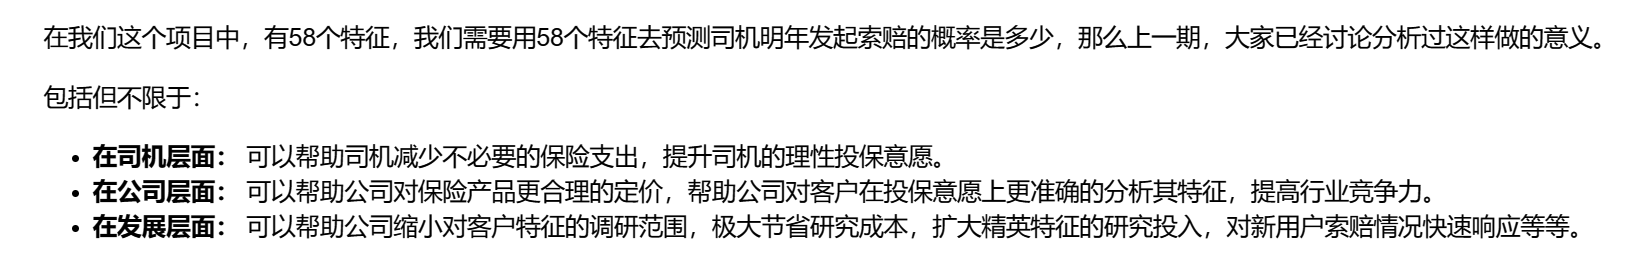

<div class="alert alert-block alert-success"><b>Step 2 (2分)</b>: 根据项目要求，简要叙述关于本项目，你们组希望从哪些方面解决问题（所解决的问题继承上一题的答案）</div>

- 业务层面

寻找当时的项目背景，从公司主营业务去考虑，在kaggle评论区去寻找项目发起人与挑战者的对话，也许能发现很多有用的信息。
- 数据层面

分析研究各个维度特征的意义，是否一些特征会有相似的地方，如何去诊断哪些特征是有效的，用什么样的数据分析手段去做数据分析，数据可视化应该从哪些方面入手，以及处理好的数据用什么模型去建模能够得到比较好的效果。。。

<div class="alert alert-block alert-success"><b>Step 3 (1分)</b>: 在接触实际数据之前，我们对项目有了初步的认识，那么我们来看看实际的数据吧！请使用pandas的read_csv函数导入项目数据（train和test）</div>

In [1]:
# 代码写在下面

import pandas as pd


train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

<div class="alert alert-block alert-info"> 
<p style="font-size:20px; display:inline">💡</p> 小贴士：

pd.read_csv的参数使用：<br> 
    <font color = #0abfab>在notebook中，点击函数，按住【Shift+Tab】，可以查看函数使用方法</font><br>
<center><font color = #fc5430 size = 3>header</font></center> 
默认值为0，意为将文件第0行数据作为列名；<br>
若header=None，则自动生成0，1，2，...为列名，文件从第0行就读取为数据；<br>
若header=1，则第0行被舍弃，第1行读取为列名；<br>
<center><font color = #fc5430 size = 3>index_col</font></center> 
    默认是None，若表中没有索引，不需设置，如果自带索引（第0列），那么需要设置 index_col = 0
<center><font color = #fc5430 size = 3>skiprows</font></center> 
    跳过某些行，例如 skiprows=lambda x: x % 2 != 0
<center><font color = #fc5430 size = 3>nrows</font></center>
    nrows=20 则读取20行，从第0行开始读
</div>

<div class="alert alert-block alert-success"><b>Step 4 (1分)</b>: 尝试用 info(), head(), tail() 函数检查训练数据和测试数据</div>

以下是比赛数据的基本描述：

由于对于客户安全性的考虑，特征名称没用明确给出。

* 属于**相似分类的特征在特征名称中被标记为**（例如，ind、reg、car、calc）。
* 特征名称包括表示二元特征的后缀 **bin**（0 or 1） 和表示分类特征的 **cat**。
* 特征**没有这些名称是连续的或有序的**。
* **-1** 的值表示该特征在观察中**缺失**。
* **target** 列表示是否为该保单持有人提出索赔。

让我们快速用代码查看数据的基本情况吧！

In [6]:
# TODO: info() 检查特征名字、非空值以及变量类型

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              892816 non-null  int64  
 1   ps_ind_01       892816 non-null  int64  
 2   ps_ind_02_cat   892816 non-null  int64  
 3   ps_ind_03       892816 non-null  int64  
 4   ps_ind_04_cat   892816 non-null  int64  
 5   ps_ind_05_cat   892816 non-null  int64  
 6   ps_ind_06_bin   892816 non-null  int64  
 7   ps_ind_07_bin   892816 non-null  int64  
 8   ps_ind_08_bin   892816 non-null  int64  
 9   ps_ind_09_bin   892816 non-null  int64  
 10  ps_ind_10_bin   892816 non-null  int64  
 11  ps_ind_11_bin   892816 non-null  int64  
 12  ps_ind_12_bin   892816 non-null  int64  
 13  ps_ind_13_bin   892816 non-null  int64  
 14  ps_ind_14       892816 non-null  int64  
 15  ps_ind_15       892816 non-null  int64  
 16  ps_ind_16_bin   892816 non-null  int64  
 17  ps_ind_17_

In [3]:
# TODO: head() 查看前10行
train.head(10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


In [11]:
test.head(10)

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1
5,5,0,1,6,0,0,1,0,0,0,...,8,1,4,9,1,0,1,0,1,0
6,6,0,1,3,0,0,0,1,0,0,...,2,0,4,6,1,1,0,0,0,0
7,8,0,1,0,0,0,1,0,0,0,...,3,1,4,9,0,1,0,0,0,0
8,10,0,1,7,0,0,0,1,0,0,...,5,1,4,6,0,0,1,0,0,0
9,11,1,1,6,0,0,0,0,0,1,...,6,1,6,10,0,1,1,0,0,0


In [6]:
# TODO: tail() 查看后7行
train.tail(7)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595205,1488009,0,0,3,6,1,0,0,1,0,...,7,1,2,6,1,0,1,0,0,0
595206,1488011,0,0,1,2,0,0,0,0,0,...,8,0,1,7,0,1,1,0,0,0
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [13]:
test.tail(7)

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
892809,1488019,2,1,7,0,0,0,0,0,1,...,7,4,3,5,0,1,1,0,0,0
892810,1488020,0,1,6,0,0,0,0,0,1,...,2,3,5,7,0,1,1,1,1,1
892811,1488022,0,1,6,0,0,0,1,0,0,...,4,2,3,4,0,1,0,0,1,0
892812,1488023,5,3,5,1,0,0,0,1,0,...,6,2,2,11,0,0,1,1,0,0
892813,1488024,0,1,5,0,0,1,0,0,0,...,5,2,2,11,0,1,1,0,0,0
892814,1488025,6,1,5,1,0,0,0,0,1,...,1,1,2,7,1,1,0,0,0,0
892815,1488026,7,1,4,1,0,0,0,0,1,...,5,2,2,7,0,1,1,1,0,0


👊<font color=red>附加挑战（2分）</font>

因为我们常常要上面的方法去检查数据，有一个基本的理解，那么我们想一下子看到数据的前五行和后五行，合并在一起。


---


**请编写一个函数，名为`check_data`，输入为dataframe，输出为一个新dataframe，满足一下条件：**


1. 一共10行，列数为输入dataframe的列数
2. 前5行是输入dataframe的前五行，后5行是输入dataframe的后五行



In [7]:
# 你的答案

def check_data(df):
    return df.head().append(df.tail())

# check
check_data(df = train)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


**补充：**

如果你有余力，建议从下面链接中完成这100道Python Pandas puzzle！来为你下一阶段保驾护航！

链接：https://github.com/ajcr/100-pandas-puzzles/blob/master/100-pandas-puzzles.ipynb

[![H65i3d.gif](https://s4.ax1x.com/2022/02/14/H65i3d.gif)](https://imgtu.com/i/H65i3d)

<img src="https://s4.ax1x.com/2022/02/14/H65vxs.jpg" alt="image-20220214212808413" style="zoom:25%;" />